In [1]:
import kagglehub
import pandas as pd
import os

# Download latest version
elections_path = kagglehub.dataset_download("yanncohen/israeli-election21-25")
crimes_url = "https://raw.githubusercontent.com/one-shot-learning/shots/7dea86975aabd2b375aaee0666598023ded5d56b/shot_18-crimes_eda/crimes.csv"

100%|██████████| 19.3M/19.3M [00:00<00:00, 52.2MB/s]

Extracting files...


In [2]:
xlsx_files = [os.path.join(elections_path, f) for f in os.listdir(elections_path) if f.endswith('.xlsx')]
dfs = [pd.read_excel(filepath) for filepath in xlsx_files]

The elections datasets contain two dataset, one about voting statistics and one about voters party elections.

In [3]:
dfs[0].iloc[8000:8002]

,name,knesset,party,id,id_eng,pct,SD_pct,diff_pct,votes,yeshuv,...,district,district_2,type,municipal_status,natural_region,pop,jews_others,jews,arabs,authority_cluster
8000,אושה,23,הליכוד בהנהגת בנימין נתניהו לראשות הממשלה,מחל,Mahal,7.69,2.011547,0.79,20,278,...,חיפה,חיפה,קיבוצים,זבולון,אזור חיפה,628.0,629.0,614.0,0.0,אשכול רשויות המפרץ
8001,אושה,24,הליכוד בהנהגת בנימין נתניהו לראשות הממשלה,מחל,Mahal,8.70,2.011547,1.01,24,278,...,חיפה,חיפה,קיבוצים,זבולון,אזור חיפה,628.0,629.0,614.0,0.0,אשכול רשויות המפרץ


In [4]:
dfs[1].iloc[20:22]

,name,knesset,can_vote,votes,pct_vote,valid_votes,invalid_votes,yeshuv,district,district_2,type,municipal_status,natural_region,pop,jews_others,jews,arabs,authority_cluster
20,אבטין,21,1632.0,645.0,39.52,627.0,18.0,652,חיפה,חיפה,יישובים לא יהודיים 4999-2000 תושבים,זבולון,אזור חיפה,2915.0,1.0,1.0,2914.0,אשכול רשויות המפרץ
21,אבטין,22,1795.0,909.0,50.64,899.0,10.0,652,חיפה,חיפה,יישובים לא יהודיים 4999-2000 תושבים,זבולון,אזור חיפה,2915.0,1.0,1.0,2914.0,אשכול רשויות המפרץ


The Crimes dataset contain data about crimes in different cities

In [5]:
df_crimes = pd.read_csv(crimes_url)
df_crimes.head(2)

,dt,region,police_district,police_merhav,police_station,crime_group,crime_type,tikim_sum,social_rank,population
0,2018-01-01,אילת,מחוז דרומי,מרחב אילת דרום,מרחב אילת דרום,NaN,NaN,199,6,52285
1,2018-04-01,אילת,מחוז דרומי,מרחב אילת דרום,מרחב אילת דרום,NaN,NaN,301,6,52285


In [ ]:
%%capture
!pip install joypy
from joypy import joyplot
import matplotlib.pyplot as plt

In [ ]:
df_yvs = dfs[0][dfs[0]["name"] != "All"]

In [8]:
df_yvs.head(2)

,name,knesset,party,id,id_eng,pct,SD_pct,diff_pct,votes,yeshuv,...,district,district_2,type,municipal_status,natural_region,pop,jews_others,jews,arabs,authority_cluster
184,אבו גוש,21,מפלגת העבודה בראשות אבי גבאי,אמת,Emet,1.90,0.890966,0.00,35,472,...,ירושלים,ירושלים,יישובים לא יהודיים 9999-5000 תושבים,מועצה מקומית,הרי יהודה,7942.0,78.0,61.0,7864.0,ללא שיוך לאשכול
185,אבו גוש,22,העבודה - גשר בראשות עמיר פרץ ואורלי לוי אבקסיס,אמת,Emet,1.66,0.890966,-0.24,40,472,...,ירושלים,ירושלים,יישובים לא יהודיים 9999-5000 תושבים,מועצה מקומית,הרי יהודה,7942.0,78.0,61.0,7864.0,ללא שיוך לאשכול


In [9]:
df_all = dfs[0][dfs[0]["name"] == "All"]

In [10]:
df_all.head(2)

,name,knesset,party,id,id_eng,pct,SD_pct,diff_pct,votes,yeshuv,...,district,district_2,type,municipal_status,natural_region,pop,jews_others,jews,arabs,authority_cluster
0,All,21,מפלגת העבודה בראשות אבי גבאי,אמת,Emet,4.43,0.994093,0.00,190870,999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,All,22,העבודה - גשר בראשות עמיר פרץ ואורלי לוי אבקסיס,אמת,Emet,4.80,0.994093,0.37,212782,999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
to_plot = (
    df_all.groupby("party", as_index=False)
    .apply(lambda gp: gp['pct'].sum())
    .rename(columns={None: 'total_pcts'})
);

<ipython-input-11-fb10c4bd14ee>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda gp: gp['pct'].sum())


In [12]:
to_plot = to_plot[to_plot['total_pcts'] > 3.0]

In [13]:
to_plot

,party,total_pcts
10,איחוד מפלגות הימין הבית היהודי-האיחוד הלאומי- ...,3.70
29,הימין החדש בראשות שקד ובנט,3.22
34,הליכוד בהנהגת בנימין נתניהו לראשות הממשלה,128.62
35,"המחנה הדמוקרטי בהנהגת הורוביץ, שפיר וברק",4.34
36,המחנה הממלכתי בהנהגת בני גנץ לראשות הממשלה,9.08
38,העבודה - גשר - מרצ,5.83
39,העבודה - גשר בראשות עמיר פרץ ואורלי לוי אבקסיס,4.80
46,הציונות הדתית בראשות בצלאל סמוטריץ',5.12
47,הציונות הדתית בראשות בצלאל סמוטריץ` ועוצמה יהודית,10.84
48,"הרשימה המשותפת (חד""ש, תע""ל, בל""ד)",4.82


# Normalizing party names and thresholding non-interesting parties

In [14]:
%%capture
!pip install fuzzywuzzy

In [15]:
parties = to_plot['party'].unique().tolist()

In [16]:
from fuzzywuzzy import fuzz, process

def normalize_names(name_list, threshold):
    unique_names = []
    name_map = {}
    for name in name_list:
        best, score = process.extractOne(name, unique_names) if unique_names else (None, 0)
        if score >= threshold:
            name_map[name] = best
        else:
            unique_names.append(name)
            name_map[name] = name
    return name_map

party_map = normalize_names(parties, 85)
to_plot["normalized_party"] = to_plot["party"].map(party_map)

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [17]:
df_party = (
    to_plot.groupby("normalized_party", as_index=False)["total_pcts"].sum()
);

In [18]:
df_party

,normalized_party,total_pcts
0,איחוד מפלגות הימין הבית היהודי-האיחוד הלאומי- ...,10.46
1,הליכוד בהנהגת בנימין נתניהו לראשות הממשלה,128.62
2,"המחנה הדמוקרטי בהנהגת הורוביץ, שפיר וברק",4.34
3,המחנה הממלכתי בהנהגת בני גנץ לראשות הממשלה,42.30
4,העבודה - גשר - מרצ,28.00
5,הציונות הדתית בראשות בצלאל סמוטריץ',28.04
6,"הרשימה המשותפת (חד""ש, תע""ל, בל""ד)",52.71
7,התאחדות הספרדים שומרי תורה תנועתו של מרן הרב ע...,31.33
8,"חד""ש תע""ל בראשות איימן עודה ואחמד טיבי",22.17
9,יהדות התורה והשבת אגודת ישראל - דגל התורה,33.34


In [19]:
df_yvs['party'] = df_yvs['party'].map(party_map)

<ipython-input-19-10fdee4d2d57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yvs['party'] = df_yvs['party'].map(party_map)


In [20]:
df_yvs.head(2)

,name,knesset,party,id,id_eng,pct,SD_pct,diff_pct,votes,yeshuv,...,district,district_2,type,municipal_status,natural_region,pop,jews_others,jews,arabs,authority_cluster
184,אבו גוש,21,העבודה - גשר - מרצ,אמת,Emet,1.90,0.890966,0.00,35,472,...,ירושלים,ירושלים,יישובים לא יהודיים 9999-5000 תושבים,מועצה מקומית,הרי יהודה,7942.0,78.0,61.0,7864.0,ללא שיוך לאשכול
185,אבו גוש,22,העבודה - גשר - מרצ,אמת,Emet,1.66,0.890966,-0.24,40,472,...,ירושלים,ירושלים,יישובים לא יהודיים 9999-5000 תושבים,מועצה מקומית,הרי יהודה,7942.0,78.0,61.0,7864.0,ללא שיוך לאשכול


In [21]:
to_plot = (
    df_yvs.groupby(["party"], as_index=False)
);

In [22]:
to_plot = to_plot.filter(lambda gp: gp['party'].iloc[0] in df_party['normalized_party'].unique().tolist())

In [23]:
%%capture
!pip install deep-translator
from deep_translator import GoogleTranslator
translator = GoogleTranslator(source='auto', target='en')

In [24]:
translation_mapping = {}
for name in df_yvs['name'].unique():
    if name not in translation_mapping:
        try:
            translated = translator.translate(name)
            translation_mapping[name] = translated
        except Exception as e:
            print(f"Translation failed for: {name}, Error: {e}")
            translation_mapping[name] = name

In [25]:
to_plot['translated_name'] = to_plot['name'].map(translation_mapping)

In [26]:
pfiltered_df = to_plot[to_plot['pop'] > 15000.0]
len(pfiltered_df['name'].unique().tolist())

110

In [27]:
grouped_df = pfiltered_df.groupby(["name", "knesset"], as_index=False)

In [28]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [29]:
to_plot = grouped_df.apply(lambda x: x).reset_index(drop=True)

<ipython-input-29-85b39be9a726>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  to_plot = grouped_df.apply(lambda x: x).reset_index(drop=True)


In [30]:
to_plot['knesset'].unique()

array([21, 22, 23, 24, 25])

In [84]:
unique_parties = to_plot['party'].unique()
num_parties = len(unique_parties)
colors = cm.get_cmap('tab20', num_parties)
party_colors = {party: colors(i / num_parties) for i, party in enumerate(unique_parties)}

unique_knesset = to_plot['knesset'].unique()
markers = ['o', 'x', '^', 's', 'D']
knesset_markers = {knesset: markers[i % len(markers)] for i, knesset in enumerate(unique_knesset)}

<ipython-input-84-21dd1de9dbab>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', num_parties)


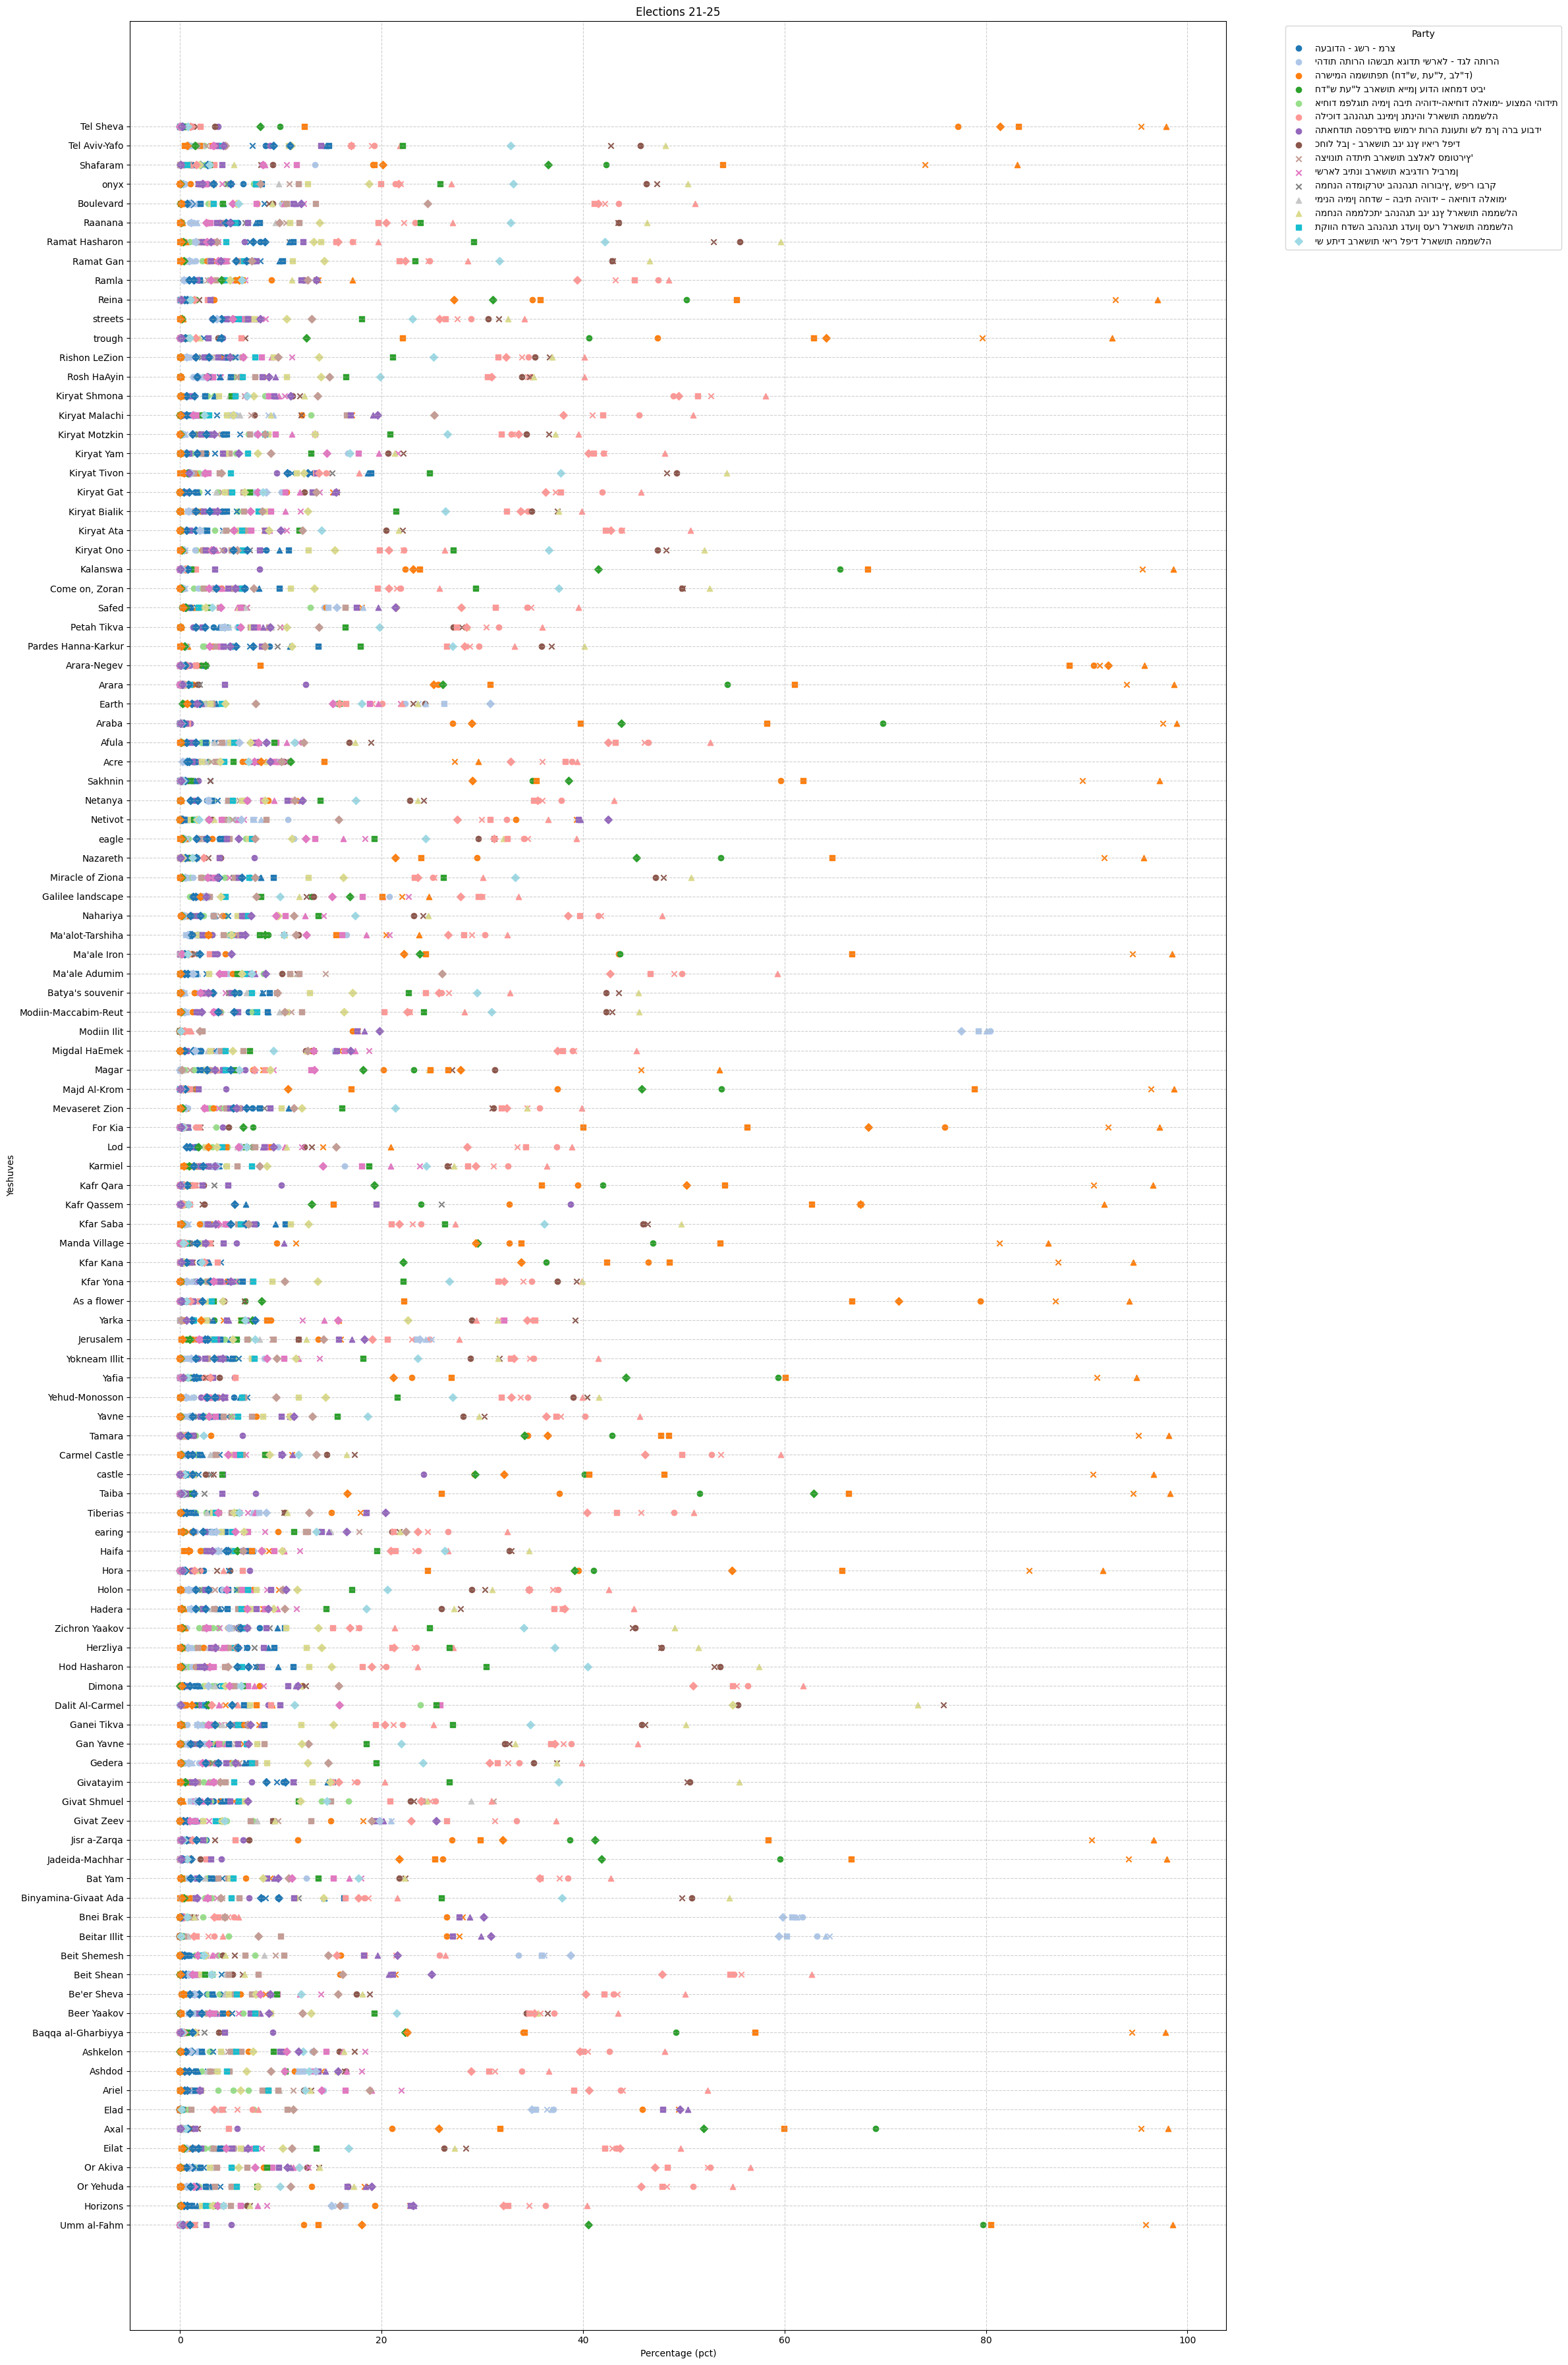

In [104]:
plt.figure(figsize=(24, 36))

for _, row in to_plot.iterrows():
    plt.scatter(
        row['pct'],
        row['translated_name'],
        color=party_colors[row['party']],
        label=row['party'] if row['party'] not in plt.gca().get_legend_handles_labels()[1] else "",
        marker=knesset_markers[row['knesset']],  # Assign marker based on knesset value
    )

plt.xlabel('Percentage (pct)')
plt.ylabel('Yeshuves')
plt.title('Elections 21-25')
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plot_file = "yeshuves_parties_knesset21-25"
plt.savefig(plot_file, dpi=300)
from IPython.display import FileLink
FileLink(plot_file)
plt.show()

In [48]:
city_to_region = {
    "אום אל-פחם": "צפון",
    "אופקים": "דרום",
    "אור יהודה": "מרכז",
    "אור עקיבא": "מרכז",
    "אילת": "דרום",
    "אכסאל": "צפון",
    "אלעד": "מרכז",
    "אריאל": "שומרון",
    "אשדוד": "דרום",
    "אשקלון": "דרום",
    "באקה אל-גרביה": "מרכז",
    "באר יעקב": "מרכז",
    "באר שבע": "דרום",
    "בית שאן": "צפון",
    "בית שמש": "מרכז",
    "ביתר עילית": "יהודה",
    "בני ברק": "מרכז",
    "בנימינה-גבעת עדה": "מרכז",
    "בת ים": "מרכז",
    "ג'דיידה-מכר": "גליל",
    "ג'סר א-זרקא": "מרכז",
    "גבעת זאב": "יהודה",
    "גבעת שמואל": "מרכז",
    "גבעתיים": "מרכז",
    "גדרה": "דרום",
    "גן יבנה": "דרום",
    "גני תקווה": "מרכז",
    "דאלית אל-כרמל": "גליל",
    "דימונה": "דרום",
    "הוד השרון": "מרכז",
    "הרצלייה": "מרכז",
    "זכרון יעקב": "מרכז",
    "חדרה": "מרכז",
    "חולון": "מרכז",
    "חורה": "נגב",
    "חיפה": "צפון",
    "חריש": "מרכז",
    "טבריה": "גליל",
    "טייבה": "מרכז",
    "טירה": "מרכז",
    "טירת כרמל": "צפון",
    "טמרה": "גליל",
    "יבנה": "דרום",
    "יהוד-מונוסון": "מרכז",
    "יפיע": "גליל",
    "יקנעם עילית": "מרכז",
    "ירושלים": "יהודה",
    "ירכא": "גליל",
    "כסיפה": "נגב",
    "כפר יונה": "מרכז",
    "כפר כנא": "גליל",
    "כפר מנדא": "גליל",
    "כפר סבא": "מרכז",
    "כפר קאסם": "מרכז",
    "כפר קרע": "גליל",
    "כרמיאל": "גליל",
    "לוד": "מרכז",
    "לקיה": "נגב",
    "מבשרת ציון": "יהודה",
    "מג'ד אל-כרום": "גליל",
    "מגאר": "גליל",
    "מגדל העמק": "צפון",
    "מודיעין עילית": "מרכז",
    "מודיעין-מכבים-רעות": "מרכז",
    "מזכרת בתיה": "מרכז",
    "מעלה אדומים": "יהודה",
    "מעלה עירון": "מרכז",
    "מעלות-תרשיחא": "גליל",
    "נהרייה": "גליל",
    "נוף הגליל": "גליל",
    "נס ציונה": "מרכז",
    "נצרת": "גליל",
    "נשר": "מרכז",
    "נתיבות": "נגב",
    "נתניה": "מרכז",
    "סח'נין": "גליל",
    "עכו": "גליל",
    "עפולה": "צפון",
    "עראבה": "גליל",
    "ערד": "נגב",
    "ערערה": "מרכז",
    "ערערה-בנגב": "נגב",
    "פרדס חנה-כרכור": "מרכז",
    "פתח תקווה": "מרכז",
    "צפת": "גליל",
    "קדימה-צורן": "מרכז",
    "קלנסווה": "מרכז",
    "קריית אונו": "מרכז",
    "קריית אתא": "צפון",
    "קריית ביאליק": "צפון",
    "קריית גת": "דרום",
    "קריית טבעון": "מרכז",
    "קריית ים": "צפון",
    "קריית מוצקין": "צפון",
    "קריית מלאכי": "דרום",
    "קריית שמונה": "גליל",
    "ראש העין": "מרכז",
    "ראשון לציון": "מרכז",
    "רהט": "נגב",
    "רחובות": "מרכז",
    "ריינה": "גליל",
    "רמלה": "מרכז",
    "רמת גן": "מרכז",
    "רמת השרון": "מרכז",
    "רעננה": "מרכז",
    "שדרות": "דרום",
    "שוהם": "מרכז",
    "שפרעם": "גליל",
    "תל אביב -יפו": "מרכז",
    "תל שבע": "נגב",
}

In [40]:
nkv_df = dfs[1][dfs[1]['name']!='All'][['name', 'knesset', 'votes']]

In [41]:
nkv_df.head(2)

,name,knesset,votes
0,אבו גוש,21,1915.0
1,אבו גוש,22,2459.0


In [42]:
to_plot.head(2)

,name,knesset,party,id,id_eng,pct,SD_pct,diff_pct,votes,yeshuv,...,district_2,type,municipal_status,natural_region,pop,jews_others,jews,arabs,authority_cluster,translated_name
0,אום אל-פחם,21,העבודה - גשר - מרצ,אמת,Emet,0.16,0.104547,0.0,25,2710,...,חדרה,יישובים לא יהודיים 99999-50000 תושבים,עירייה,הר אלכסנדר,58665.0,57.0,28.0,58607.0,ללא שיוך לאשכול,Umm al-Fahm
1,אום אל-פחם,21,יהדות התורה והשבת אגודת ישראל - דגל התורה,ג,G,0.01,0.046043,0.0,2,2710,...,חדרה,יישובים לא יהודיים 99999-50000 תושבים,עירייה,הר אלכסנדר,58665.0,57.0,28.0,58607.0,ללא שיוך לאשכול,Umm al-Fahm


In [45]:
to_plot = pd.merge(to_plot, nkv_df, on=['name', 'knesset'], how='left')

In [46]:
to_plot.head(2)

,name,knesset,party,id,id_eng,pct,SD_pct,diff_pct,votes_x,yeshuv,...,type,municipal_status,natural_region,pop,jews_others,jews,arabs,authority_cluster,translated_name,votes_y
0,אום אל-פחם,21,העבודה - גשר - מרצ,אמת,Emet,0.16,0.104547,0.0,25,2710,...,יישובים לא יהודיים 99999-50000 תושבים,עירייה,הר אלכסנדר,58665.0,57.0,28.0,58607.0,ללא שיוך לאשכול,Umm al-Fahm,15671.0
1,אום אל-פחם,21,יהדות התורה והשבת אגודת ישראל - דגל התורה,ג,G,0.01,0.046043,0.0,2,2710,...,יישובים לא יהודיים 99999-50000 תושבים,עירייה,הר אלכסנדר,58665.0,57.0,28.0,58607.0,ללא שיוך לאשכול,Umm al-Fahm,15671.0


In [49]:
to_plot['general_regions'] = to_plot['name'].map(city_to_region)

In [50]:
to_plot.rename({'general_regions': 'general_region'}, axis=1, inplace=True)

In [59]:
to_plot.head(2)

,name,knesset,party,id,id_eng,pct,SD_pct,diff_pct,votes_x,yeshuv,...,municipal_status,natural_region,pop,jews_others,jews,arabs,authority_cluster,translated_name,votes_y,general_region
0,אום אל-פחם,21,העבודה - גשר - מרצ,אמת,Emet,0.16,0.104547,0.0,25,2710,...,עירייה,הר אלכסנדר,58665.0,57.0,28.0,58607.0,ללא שיוך לאשכול,Umm al-Fahm,15671.0,צפון
1,אום אל-פחם,21,יהדות התורה והשבת אגודת ישראל - דגל התורה,ג,G,0.01,0.046043,0.0,2,2710,...,עירייה,הר אלכסנדר,58665.0,57.0,28.0,58607.0,ללא שיוך לאשכול,Umm al-Fahm,15671.0,צפון


In [83]:
region_plot = (
    to_plot.groupby(['party', 'knesset', 'general_region'], as_index=False)
    .apply(lambda gp: (gp['votes_x'].sum() / gp['votes_y'].sum()) * 100)
    .rename(columns={None: 'region_pct'})
)

<ipython-input-83-8dd441079feb>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda gp: (gp['votes_x'].sum() / gp['votes_y'].sum()) * 100)


In [80]:
region_plot.head(5)

,party,knesset,general_region,region_pct
0,איחוד מפלגות הימין הבית היהודי-האיחוד הלאומי- ...,21,גליל,2.008553
1,איחוד מפלגות הימין הבית היהודי-האיחוד הלאומי- ...,21,דרום,3.374346
2,איחוד מפלגות הימין הבית היהודי-האיחוד הלאומי- ...,21,יהודה,4.313394
3,איחוד מפלגות הימין הבית היהודי-האיחוד הלאומי- ...,21,מרכז,3.030069
4,איחוד מפלגות הימין הבית היהודי-האיחוד הלאומי- ...,21,נגב,1.569818


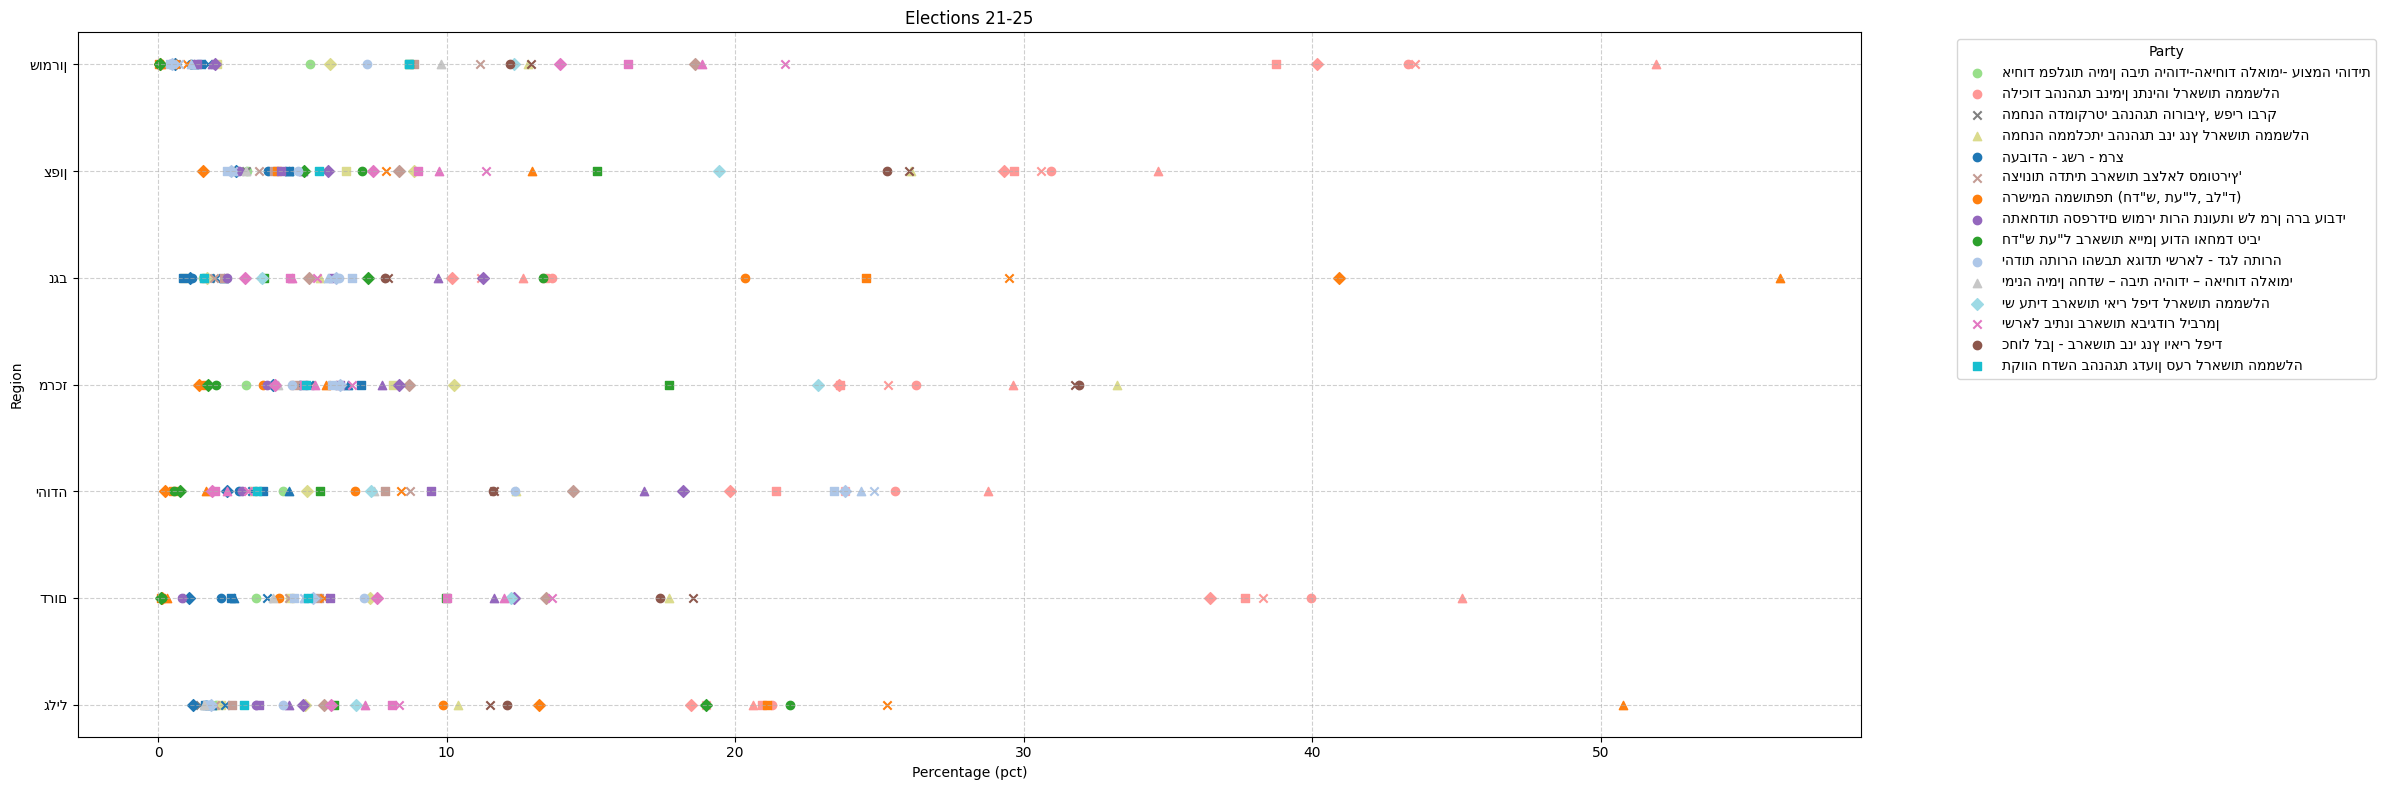

In [81]:
plt.figure(figsize=(24, 8))

for _, row in region_plot.iterrows():
    plt.scatter(
        row['region_pct'],
        row['general_region'],
        color=party_colors[row['party']],
        label=row['party'] if row['party'] not in plt.gca().get_legend_handles_labels()[1] else "",
        marker=knesset_markers[row['knesset']],  # Assign marker based on knesset value
    )

plt.xlabel('Percentage (pct)')
plt.ylabel('Region')
plt.title('Elections 21-25')
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

In [88]:
import numpy as np

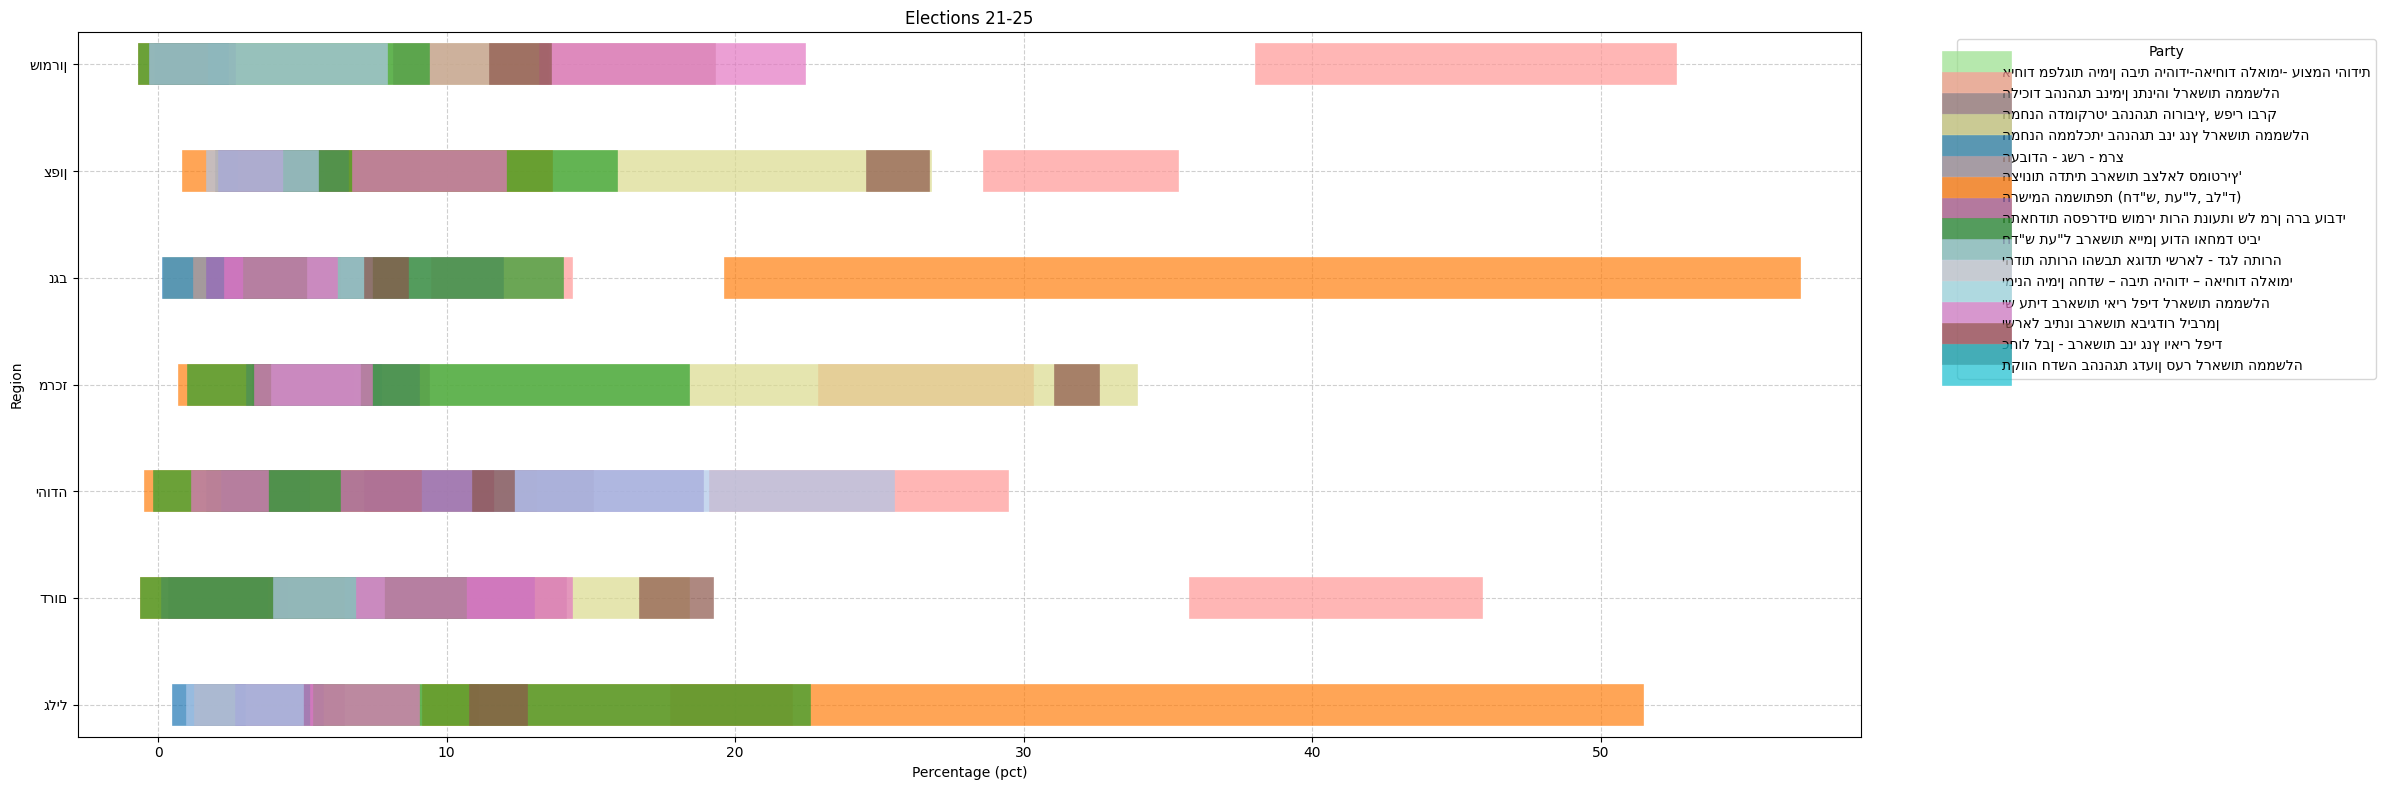

In [96]:
plt.figure(figsize=(24, 8))

for (party, region), group in region_plot.groupby(['party', 'general_region']):
    min_pct = group['region_pct'].min()
    max_pct = group['region_pct'].max()

    plt.plot(
        [min_pct, max_pct],
        [region, region],
        color=party_colors[party],
        label=party if party not in plt.gca().get_legend_handles_labels()[1] else "",
        linewidth=30,
        alpha=0.7
    )


plt.xlabel('Percentage (pct)')
plt.ylabel('Region')
plt.title('Elections 21-25')
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()